# Team Projects

The datasets we'll use for our **Team Projects** come from the [Housing Affordability Data System](https://catalog.data.gov/dataset/housing-affordability-data-system-hads).
See their website for more information about the data.

We've downloaded the data into the **/data** folder called `project.zip` which is password-protected:

In [ ]:
sx ls ../data

To unzip that data using Python libraries:

In [ ]:
import zipfile
import os.path

password = "housing23" # ask the instructor for the password
path = "../data"

with zipfile.ZipFile(os.path.join(path, "project.zip")) as zf:
    file_list = zf.namelist()
    zf.extractall(path=path, pwd=bytes(password, "utf-8"))

Let's confirm that the [Python-based `unzip`](https://docs.python.org/3/library/zipfile.html) worked correctly, let's look for files in the target directory:

In [ ]:
sx ls ../data/project

What's in those files?

In [ ]:
import pandas as pd

for filename in file_list:
    fullpath = os.path.join(path, filename)

    if os.path.isfile(fullpath):
        df = pd.read_csv(fullpath)
        print(fullpath)
        print(df.head(4))

Next is your turn :)
In your teams, work through the stages of data prep, exploring the data, representation, modeling, evaluation, visualization, and so.
Impress us with what you can do with this dataset.

One hint: you may want to use [`join()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) during data preparation.

In [2]:
import os.path
import pandas as pd

path = "../data/project"
filename = "thads2013m.csv"
fullpath = os.path.join(path, filename)

df_m = pd.read_csv(fullpath).replace("'","", regex=True)
df_m.head(4)
df_m.columns = [i.upper() for i in df_m.columns]
df_m_col = sorted(df_m.columns.tolist())
df_m_col_upper = [i.upper() for i in df_m_col]

df_m['CONTROL'] = df_m['CONTROL'].astype(str)
df_m['CONTROL'].unique()

array(['000000054288', '000000054290', '000000054291', ..., '999900056754',
       '999900056757', '999900056758'], dtype=object)

In [3]:
import os.path
import pandas as pd

path = "../data/project"
filename = "thads2013n.csv"
fullpath = os.path.join(path, filename)

df_n = pd.read_csv(fullpath).replace("'","", regex=True)
df_n.head(4)
df_n.columns = [i.upper() for i in df_n.columns]
df_n_col = sorted(df_n.columns.tolist())
df_n_col_upper = [i.upper() for i in df_n_col]

df_n['CONTROL'] = df_n['CONTROL'].astype(str)
df_n['CONTROL'].unique()

array(['100003130103', '100006110249', '100006370140', ..., '999900056784',
       '999900056785', '999900056786'], dtype=object)

In [ ]:
# What are the intersection of columns shared between both datasets?
intersection_col = sorted(list(set(df_m_col_upper) & set(df_m_col_upper)))
print(intersection_col)

In [4]:
import os.path
import pandas as pd

path = "../data/project"
filename = "HUD_median_incomes_1985_2009.csv"
fullpath = os.path.join(path, filename)

df_median = pd.read_csv(fullpath)
df_median.head(4)

# sorted(df_median.columns.tolist())

,IN09_SMSA,MSA_Codebook,MSA,IN85_HUDMED,IN87_HUDMED,IN89_HUDMED,IN91_HUDMED,IN93_HUDMED,IN95_HUDMED,IN97_HUDMED,IN99_HUDMED,IN01_HUDMED,IN03_HUDMED,IN05_HUDMED,IN07_HUDMED,IN09_HUDMED
0,80,"0080 Akron, OH",80,29450,31500,34800,40000,40100,41300,44300,49900,54100,60300,60700,60300.0,65000.00
1,160,"0160 Albany-Schenectady-Troy, NY",160,27450,29500,32800,37500,43800,43800,47000,49700,53000,59800,63450,63500.0,70816.67
2,200,"0200 Albuquerque, NM",200,26350,29700,32100,34600,37600,38300,44400,46100,49000,51400,54200,55900.0,59500.00
3,240,"0240 Allentown-Bethlehem-Easton, PA",240,28550,31100,33700,38600,43000,43000,45800,49400,52000,59700,60650,65800.0,70000.00


In [4]:
combined_df = pd.concat([df_n, df_m], join='outer', ignore_index=True)
combined_df.shape

# cols_merge = list(set(df_m.columns) - (set(df_m.columns) - set(df_n.columns)))
# df_merge2 = pd.merge(df_m, df_n, on=cols_merge, how='outer')
# from IPython.display import display
# pd.options.display.max_columns = None
# df_merge2.describe()
# df_merge2.shape
# sorted(df_merge2.columns.tolist())

(130434, 102)

In [18]:
combined_df.head(10)

,ABL30,ABL50,ABL80,ABLMED,AGE1,APLMED,ASSISTED,BEDRMS,BUILT,BURDEN,CONTROL,COST06,COST06RELAMICAT,COST06RELAMIPCT,COST06RELFMRCAT,COST06RELFMRPCT,COST06RELPOVCAT,COST06RELPOVPCT,COST08,COST08RELAMICAT,COST08RELAMIPCT,COST08RELFMRCAT,COST08RELFMRPCT,COST08RELPOVCAT,COST08RELPOVPCT,COST12,COST12RELAMICAT,COST12RELAMIPCT,COST12RELFMRCAT,COST12RELFMRPCT,COST12RELPOVCAT,COST12RELPOVPCT,COSTMED,COSTMEDRELAMICAT,COSTMEDRELAMIPCT,COSTMEDRELFMRCAT,COSTMEDRELFMRPCT,COSTMEDRELPOVCAT,COSTMEDRELPOVPCT,FMR,FMTASSISTED,FMTBEDRMS,FMTBUILT,FMTBURDEN,FMTCOST06RELAMICAT,FMTCOST06RELFMRCAT,FMTCOST06RELPOVCAT,FMTCOST08RELAMICAT,FMTCOST08RELFMRCAT,FMTCOST08RELPOVCAT,FMTCOST12RELAMICAT,FMTCOST12RELFMRCAT,FMTCOST12RELPOVCAT,FMTCOSTMEDRELAMICAT,FMTCOSTMEDRELFMRCAT,FMTCOSTMEDRELPOVCAT,FMTINCRELAMICAT,FMTINCRELFMRCAT,FMTINCRELPOVCAT,FMTMETRO3,FMTOWNRENT,FMTREGION,FMTSTATUS,FMTSTRUCTURETYPE,FMTZADEQ,GL30,GL50,GL80,GLMED,INCRELAMICAT,INCRELAMIPCT,INCRELFMRCAT,INCRELFMRPCT,INCRELPOVCAT,INCRELPOVPCT,IPOV,L30,L50,L80,LMED,METRO,METRO3,NUNITS,OTHERCOST,OWNRENT,PER,REGION,ROOMS,SMSA,STATUS,STRUCTURETYPE,TENURE,TOTSAL,TYPE,UTILITY,VACANCY,VALUE,WEIGHT,WGTMETRO,ZADEQ,ZINC2,ZSMHC
0,20234.571429,33702.428571,51842.571429,66364.20,82,51616.6,-9,2,2006,0.354919,100003130103,648.588189,2,39.092655,2,67.843953,4,234.422405,696.905247,2,42.004891,2,72.898038,4,251.885876,803.050535,2,48.402635,2,84.001102,4,290.250487,615.156712,2,37.077624,2,64.346936,4,222.339102,956.0,.,2 2BR,2000-2009,2 30% to 50%,2 30 - 50% AMI,2 50.1 - 100% FMR,4 200%+ Poverty,2 30 - 50% AMI,2 50.1 - 100% FMR,4 200%+ Poverty,2 30 - 50% AMI,2 50.1 - 100% FMR,4 200%+ Poverty,2 30 - 50% AMI,2 50.1 - 100% FMR,4 200%+ Poverty,2 30 - 50% AMI,1 LTE 50% FMR,3 150-200% Poverty,-5,1 Owner,-5,-5,1 Single Family,1 Adequate,15738,26213,40322,73738,2,34.913187,1,47.126046,3,162.835457,11067,15738,26213,40322,73738,NaN,3,1,213.750000,1,1,1,6,NaN,1,1,1,0,1,169.000000,-6,40000,3117.394239,NaN,1,18021,533
1,19911.400000,33180.640000,53063.040000,64781.36,50,55846.0,-9,4,1980,0.047527,100006110249,1167.640781,4,72.097331,3,106.149162,3,192.855030,1324.671218,4,81.793356,3,120.424656,4,218.791183,1669.643405,6,103.094063,3,151.785764,4,275.768999,1058.988479,4,65.388468,2,96.271680,3,174.909320,1100.0,.,4 4BR+,1980-1989,1 Less than 30%,4 60 - 80% AMI,3 GT FMR,3 150-200% Poverty,4 60 - 80% AMI,3 GT FMR,4 200%+ Poverty,6 100 - 120% AMI,3 GT FMR,4 200%+ Poverty,4 60 - 80% AMI,2 50.1 - 100% FMR,3 150-200% Poverty,7 120% AMI +,3 GT FMR,4 200%+ Poverty,-5,1 Owner,-5,-5,1 Single Family,1 Adequate,17165,28604,45744,55846,7,220.178706,3,279.456818,4,507.725659,24218,17165,28604,45744,55846,NaN,5,1,58.333333,1,4,3,6,NaN,1,1,1,123000,1,245.333333,-6,130000,2150.725544,NaN,1,122961,487
2,19937.500000,33200.650000,53090.300000,64781.36,53,44676.8,-9,4,1985,0.602703,100006370140,1193.393209,4,73.687444,3,108.490292,4,308.569673,1374.582175,5,84.875166,3,124.962016,4,355.418791,1772.627006,6,109.452905,3,161.147910,4,458.339239,1068.025168,4,65.946449,2,97.093197,4,276.153890,1100.0,.,4 4BR+,1980-1989,3 50% or More,4 60 - 80% AMI,3 GT FMR,4 200%+ Poverty,5 80 - 100% AMI,3 GT FMR,4 200%+ Poverty,6 100 - 120% AMI,3 GT FMR,4 200%+ Poverty,4 60 - 80% AMI,2 50.1 - 100% FMR,4 200%+ Poverty,4 60 - 80% AMI,2 50.1 - 100% FMR,3 150-200% Poverty,-5,1 Owner,-5,-5,1 Single Family,1 Adequate,13750,22897,36614,55846,4,62.614153,2,63.577273,3,180.827408,15470,13750,22897,36614,55846,NaN,5,1,37.500000,1,2,3,7,NaN,1,1,1,28000,1,159.000000,-6,150000,2213.789404,NaN,1,27974,1405
3,17875.000000,29766.100000,47598.200000,58079.84,67,44676.8,-9,3,1985,0.103911,100006520140,1578.857612,6,108.737050,3,166.370665,4,452.265142,1820.442900,7,125.375201,3,191.827492,4,521.467459,2351.169341,7,161.926709,3,247.752301,4,673.494512,1411.700224,5,97.224801,3,148.756610,4,404.382763,949.0,.,3 3BR,1980-1989,1 Less than 30%,6 100 - 120% AMI,3 GT FMR,4 200%+ Poverty,7 120% AMI +,3 GT FMR,4 200%+ Poverty,7 120% AMI +,3 GT FMR,4 200%+ Poverty,5 80 - 100% AMI,3 GT FMR,4

In [ ]:
# Are there any duplicate CONTROL?
print(any(combined_df['CONTROL'].duplicated()))

In [19]:
from IPython.display import display
pd.options.display.max_columns = None
combined_df.describe()

,ABL30,ABL50,ABL80,ABLMED,AGE1,APLMED,ASSISTED,BEDRMS,BUILT,BURDEN,COST06,COST06RELAMICAT,COST06RELAMIPCT,COST06RELFMRCAT,COST06RELFMRPCT,COST06RELPOVCAT,COST06RELPOVPCT,COST08,COST08RELAMICAT,COST08RELAMIPCT,COST08RELFMRCAT,COST08RELFMRPCT,COST08RELPOVCAT,COST08RELPOVPCT,COST12,COST12RELAMICAT,COST12RELAMIPCT,COST12RELFMRCAT,COST12RELFMRPCT,COST12RELPOVCAT,COST12RELPOVPCT,COSTMED,COSTMEDRELAMICAT,COSTMEDRELAMIPCT,COSTMEDRELFMRCAT,COSTMEDRELFMRPCT,COSTMEDRELPOVCAT,COSTMEDRELPOVPCT,FMR,GL30,GL50,GL80,GLMED,INCRELAMICAT,INCRELAMIPCT,INCRELFMRCAT,INCRELFMRPCT,INCRELPOVCAT,INCRELPOVPCT,IPOV,L30,L50,L80,LMED,NUNITS,OTHERCOST,PER,ROOMS,STRUCTURETYPE,TOTSAL,TYPE,UTILITY,VACANCY,VALUE,WEIGHT,WGTMETRO,ZINC2,ZSMHC
count,130434.000000,130434.000000,130434.000000,130434.000000,130434.000000,130434.000000,130434.000000,130434.000000,130434.000000,130434.000000,130434.000000,130434.000000,130434.000000,130434.000000,130434.000000,130434.000000,130434.000000,130434.000000,130434.000000,130434.000000,130434.000000,130434.000000,130434.000000,130434.000000,130434.000000,130434.000000,130434.000000,130434.000000,130434.000000,130434.000000,130434.000000,130434.000000,130434.000000,130434.000000,130434.000000,130434.000000,130434.000000,130434.000000,130434.000000,130434.000000,130434.000000,130434.000000,130434.000000,130434.000000,130434.000000,130434.000000,130434.000000,130434.000000,130434.000000,130434.000000,130434.000000,130434.000000,130434.000000,130434.000000,130434.000000,130434.000000,130434.000000,130434.000000,130434.000000,1.304340e+05,130434.000000,130434.000000,130434.000000,1.304340e+05,64535.000000,65899.000000,1.304340e+05,130434.000000
mean,10335.163579,35188.354695,54726.483040,68732.863137,46.993660,54342.424727,-5.711824,2.705361,1969.729672,2.135639,1551.293538,4.100212,87.058908,2.416325,124.997049,3.028865,372.817041,1724.633779,4.325835,96.169760,2.471303,137.745075,3.066501,414.255111,2105.436144,4.683587,116.184929,2.541400,165.750564,3.111589,505.288302,1431.356178,3.912431,80.754938,2.364115,116.176451,2.991958,344.145264,1194.078838,8758.904304,29564.484099,45976.161783,69192.521497,3.576529,108.929417,1.477537,130.878945,2.333142,378.057809,16431.430601,8758.904304,29564.484099,45976.161783,69192.521497,12.982267,73.526944,1.856487,5.714706,1.857629,4.801912e+04,1.074973,190.185350,-5.444769,1.434999e+05,1885.195459,306.320683,6.475326e+04,1091.712368
std,10976.222441,8269.769417,11001.850374,16967.952950,22.765923,20920.489335,4.414813,1.082335,25.827433,131.287232,1599.780295,1.892411,79.727791,0.690945,103.994841,2.449130,405.362285,1873.924399,1.956062,92.881514,0.684869,120.719681,2.448396,472.462737,2488.525556,2.046477,122.830988,0.670958,159.285448,2.447287,623.457980,1413.713644,1.834592,70.929714,0.694623,92.942103,2.449212,359.967937,388.472224,9394.791641,7470.993363,10195.204671,13287.080196,4.107286,126.534372,3.007205,146.031907,3.335395,450.771406,6518.260693,9394.791641,7470.993363,10195.204671,13287.080196,50.569395,154.419851,2.577640,1.901373,1.435895,6.766669e+04,0.524220,128.556802,2.032452,2.397738e+05,1245.591074,220.117997,7.817679e+04,952.648555
min,-9.000000,17126.000000,27403.000000,28875.000000,-9.000000,-9.000000,-9.000000,0.000000,1919.000000,-9.000000,0.000000,1.000000,0.000000,1.000000,0.000000,-9.000000,-9.000000,0.000000,1.000000,0.000000,1.000000,0.000000,-9.000000,-9.000000,0.000000,1.000000,0.000000,1.000000,0.000000,-9.000000,-9.000000,0.000000,1.000000,0.000000,1.000000,0.000000,-9.000000,-9.000000,394.000000,-9.000000,17057.000000,27307.000000,38500.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-6.000000,-9.000000,17057.000000,27307.000000,38500.000000,-7.000000,0.000000,-6.000000,1.000000,-9.000000,-9.000000e+00,1.000000,0.000000,-6.000000,-6.000000e+00,0.000000,0.000000,-1.170000e+02,-6.000000
25%,-9.000000,29536.000000,47268.000000,56840.000000,34.000000,45367.000000,-9.000000,2.000000,1950.000000,0.116271,751.000000,2.000000,49.158546,2.000000,74

In [ ]:
combined_df['SMSA'].unique()

In [ ]:
# What are the datatypes?
pd.set_option("display.max_rows", 999)
combined_df.dtypes

In [5]:
# Fix weird numbers.
combined_df['AGE1'].value_counts(sort=False).sort_index()
combined_df = combined_df[combined_df['AGE1'] >= 18]
combined_df.shape


(120959, 102)

In [6]:
# AGE1, APLMED, BUILT, BURDEN, COSTMED, FMR, ASSISTED, ZINC2, ZSMHC, VALUE, PER, LMED
var_of_interest = ['AGE1', 
                   'APLMED', 
                   'BUILT', 
                   'BURDEN', 
                   'COSTMED', 
                   'FMR', 
                   'ZSMHC', 
                   'PER', 
                   'LMED', 
                   'ZINC2',
                   'UTILITY',
                   'FMTSTRUCTURETYPE',
                   'TENURE']
for var in var_of_interest:
    combined_df = combined_df[~combined_df[var]
                    .isin([-6, -7, -8, -9, '-6', '-7', '-8', '-9'])]
                    .dropna(subset=[var_of_interest])

combined_df.shape

(120959, 102)

In [62]:
combined_df['TENURE'].value_counts(sort=False).sort_index()

1    74530
2    44960
3     1667
Name: TENURE, dtype: int64

In [44]:
# Combine with text names for MSAs.
def get_msa_codebook(x): 
    try: 
        return list(median_df[median_df["MSA"]==int(x)]["MSA_Codebook"])[0] 
    except: 
        return None 
combined_df["MSA_CODEBOOK"] = combined_df["SMSA"].apply(lambda x: get_msa_codebook(x))

In [48]:
combined_df["MSA_CODEBOOK"].value_counts(sort=False).sort_index()
combined_df

,ABL30,ABL50,ABL80,ABLMED,AGE1,APLMED,ASSISTED,BEDRMS,BUILT,BURDEN,CONTROL,COST06,COST06RELAMICAT,COST06RELAMIPCT,COST06RELFMRCAT,COST06RELFMRPCT,COST06RELPOVCAT,COST06RELPOVPCT,COST08,COST08RELAMICAT,COST08RELAMIPCT,COST08RELFMRCAT,COST08RELFMRPCT,COST08RELPOVCAT,COST08RELPOVPCT,COST12,COST12RELAMICAT,COST12RELAMIPCT,COST12RELFMRCAT,COST12RELFMRPCT,COST12RELPOVCAT,COST12RELPOVPCT,COSTMED,COSTMEDRELAMICAT,COSTMEDRELAMIPCT,COSTMEDRELFMRCAT,COSTMEDRELFMRPCT,COSTMEDRELPOVCAT,COSTMEDRELPOVPCT,FMR,FMTASSISTED,FMTBEDRMS,FMTBUILT,FMTBURDEN,FMTCOST06RELAMICAT,FMTCOST06RELFMRCAT,FMTCOST06RELPOVCAT,FMTCOST08RELAMICAT,FMTCOST08RELFMRCAT,FMTCOST08RELPOVCAT,FMTCOST12RELAMICAT,FMTCOST12RELFMRCAT,FMTCOST12RELPOVCAT,FMTCOSTMEDRELAMICAT,FMTCOSTMEDRELFMRCAT,FMTCOSTMEDRELPOVCAT,FMTINCRELAMICAT,FMTINCRELFMRCAT,FMTINCRELPOVCAT,FMTMETRO3,FMTOWNRENT,FMTREGION,FMTSTATUS,FMTSTRUCTURETYPE,FMTZADEQ,GL30,GL50,GL80,GLMED,INCRELAMICAT,INCRELAMIPCT,INCRELFMRCAT,INCRELFMRPCT,INCRELPOVCAT,INCRELPOVPCT,IPOV,L30,L50,L80,LMED,METRO,METRO3,NUNITS,OTHERCOST,OWNRENT,PER,REGION,ROOMS,SMSA,STATUS,STRUCTURETYPE,TENURE,TOTSAL,TYPE,UTILITY,VACANCY,VALUE,WEIGHT,WGTMETRO,ZADEQ,ZINC2,ZSMHC,MSA_CODEBOOK
0,20234.571429,33702.428571,51842.571429,66364.20,82,51616.6,-9,2,2006,0.354919,100003130103,648.588189,2,39.092655,2,67.843953,4,234.422405,696.905247,2,42.004891,2,72.898038,4,251.885876,803.050535,2,48.402635,2,84.001102,4,290.250487,615.156712,2,37.077624,2,64.346936,4,222.339102,956.0,.,2 2BR,2000-2009,2 30% to 50%,2 30 - 50% AMI,2 50.1 - 100% FMR,4 200%+ Poverty,2 30 - 50% AMI,2 50.1 - 100% FMR,4 200%+ Poverty,2 30 - 50% AMI,2 50.1 - 100% FMR,4 200%+ Poverty,2 30 - 50% AMI,2 50.1 - 100% FMR,4 200%+ Poverty,2 30 - 50% AMI,1 LTE 50% FMR,3 150-200% Poverty,-5,1 Owner,-5,-5,1 Single Family,1 Adequate,15738,26213,40322,73738,2,34.913187,1,47.126046,3,162.835457,11067,15738,26213,40322,73738,NaN,3,1,213.750000,1,1,1,6,NaN,1,1,1,0,1,169.000000,-6,40000,3117.394239,NaN,1,18021,533,None
1,19911.400000,33180.640000,53063.040000,64781.36,50,55846.0,-9,4,1980,0.047527,100006110249,1167.640781,4,72.097331,3,106.149162,3,192.855030,1324.671218,4,81.793356,3,120.424656,4,218.791183,1669.643405,6,103.094063,3,151.785764,4,275.768999,1058.988479,4,65.388468,2,96.271680,3,174.909320,1100.0,.,4 4BR+,1980-1989,1 Less than 30%,4 60 - 80% AMI,3 GT FMR,3 150-200% Poverty,4 60 - 80% AMI,3 GT FMR,4 200%+ Poverty,6 100 - 120% AMI,3 GT FMR,4 200%+ Poverty,4 60 - 80% AMI,2 50.1 - 100% FMR,3 150-200% Poverty,7 120% AMI +,3 GT FMR,4 200%+ Poverty,-5,1 Owner,-5,-5,1 Single Family,1 Adequate,17165,28604,45744,55846,7,220.178706,3,279.456818,4,507.725659,24218,17165,28604,45744,55846,NaN,5,1,58.333333,1,4,3,6,NaN,1,1,1,123000,1,245.333333,-6,130000,2150.725544,NaN,1,122961,487,None
2,19937.500000,33200.650000,53090.300000,64781.36,53,44676.8,-9,4,1985,0.602703,100006370140,1193.393209,4,73.687444,3,108.490292,4,308.569673,1374.582175,5,84.875166,3,124.962016,4,355.418791,1772.627006,6,109.452905,3,161.147910,4,458.339239,1068.025168,4,65.946449,2,97.093197,4,276.153890,1100.0,.,4 4BR+,1980-1989,3 50% or More,4 60 - 80% AMI,3 GT FMR,4 200%+ Poverty,5 80 - 100% AMI,3 GT FMR,4 200%+ Poverty,6 100 - 120% AMI,3 GT FMR,4 200%+ Poverty,4 60 - 80% AMI,2 50.1 - 100% FMR,4 200%+ Poverty,4 60 - 80% AMI,2 50.1 - 100% FMR,3 150-200% Poverty,-5,1 Owner,-5,-5,1 Single Family,1 Adequate,13750,22897,36614,55846,4,62.614153,2,63.577273,3,180.827408,15470,13750,22897,36614,55846,NaN,5,1,37.500000,1,2,3,7,NaN,1,1,1,28000,1,159.000000,-6,150000,2213.789404,NaN,1,27974,1405,None
3,17875.000000,29766.100000,47598.200000,58079.84,67,44676.8,-9,3,1985,0.103911,100006520140,1578.857612,6,108.737050,3,166.370665,4,452.265142,1820.442900,7,125.375201,3,191.827492,4,521.467459,2351.169341,7,161.926709,3,247.752301,4,673.494512,1411.700224,5,97.224801,3,148.756610,4,404.382763,949.0,.,3 3BR,1980-1989,1 Less than 30%,6 100 - 120% AMI,3 GT FMR,4 200%+ Poverty,7 120% AMI +,3 GT FMR,4 200%+ Poverty,7 120% AMI +,3 GT FMR,4 200%+ Povert

In [7]:
from sklearn.preprocessing import MinMaxScaler

# Look at only variables of interest
sliced_df = combined_df[['AGE1', 
                         'APLMED', 
                         'BUILT', 
                         'BURDEN', 
                         'COSTMED', 
                         'FMR', 
                         'ZSMHC', 
                         'PER', 
                         'LMED', 
                         'ZINC2',
                         'UTILITY',
                         'FMTSTRUCTURETYPE',
                         'TENURE']]
sliced_df.rename(columns={'AGE1': 'AGE',
                          'APLMED': 'MED_INC_PERSON',
                          'BUILT': 'BUILT',
                          'BURDEN': 'BURDEN',
                          'COSTMED': 'HOUSING_COST_MED_INTEREST',
                          'FMR': 'FAIRMARKET_RENT',
                          'ZSMHC': 'MONTHLY_HOUSING_COST',
                          'PER': 'N_PERSON_HOUSEHOLD',
                          'LMED': 'AREA_MED_INCOME',
                          'ZINC2': 'HOUSEHOLD_INCOME',
                          'UTILITY': 'UTILITY',
                          'FMTSTRUCTURETYPE': 'STRUCTURE_TYPE',
                          'TENURE': 'TENURE'}, inplace=True)
sliced_df = sliced_df[sliced_df['STRUCTURE_TYPE'] != '.']
sliced_df['STRUCTURE_TYPE'] = sliced_df['STRUCTURE_TYPE'].apply(lambda x: int(x[0]))
sliced_df = sliced_df[sliced_df['HOUSEHOLD_INCOME'] >= 0]
sliced_df = sliced_df[sliced_df['BURDEN'] >= 0]

# Normalize columns, which have a large range of values from .describe()
scaler = MinMaxScaler()
col_to_normalize = ['MED_INC_PERSON',
                    'BURDEN',
                    'HOUSING_COST_MED_INTEREST',
                    'FAIRMARKET_RENT',
                    'MONTHLY_HOUSING_COST',
                    'AREA_MED_INCOME',
                    'HOUSEHOLD_INCOME',
                    'UTILITY']
normalized_df = sliced_df
normalized_df[col_to_normalize] = scaler.fit_transform(normalized_df[col_to_normalize])

# One hot encoding for structure_type
one_hot = pd.get_dummies(normalized_df['STRUCTURE_TYPE'], prefix='STRUCTURE_TYPE')
normalized_df = normalized_df.join(one_hot)

/Users/cat/anaconda2/lib/python2.7/site-packages/pandas/core/frame.py:2746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


In [86]:
sliced_df.describe()

,AGE,MED_INC_PERSON,BUILT,BURDEN,HOUSING_COST_MED_INTEREST,FAIRMARKET_RENT,MONTHLY_HOUSING_COST,N_PERSON_HOUSEHOLD,AREA_MED_INCOME,HOUSEHOLD_INCOME,UTILITY,STRUCTURE_TYPE
count,117983.000000,117983.000000,117983.000000,117983.000000,117983.000000,117983.000000,117983.000000,117983.000000,117983.000000,117983.000000,117983.000000,117983.000000
mean,51.445005,0.166257,1969.847766,0.000118,0.045465,0.261366,0.107195,2.471246,0.402152,0.048669,0.122489,1.802573
std,17.276079,0.079330,25.778138,0.005292,0.044381,0.125093,0.084972,1.437829,0.174150,0.053822,0.079811,1.413363
min,2.000000,0.000000,1919.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,38.000000,0.106955,1950.000000,0.000005,0.022988,0.172281,0.052546,1.000000,0.285156,0.016970,0.067989,1.000000
50%,51.000000,0.149555,1975.000000,0.000009,0.034642,0.239974,0.086823,2.000000,0.342578,0.033984,0.112730,1.000000
75%,64.000000,0.208138,1990.000000,0.000015,0.054094,0.331408,0.136022,3.000000,0.513724,0.062536,0.161810,2.000000
max,94.000000,1.000000,2013.000000,1.000000,1.000000,1.000000,1.000000,20.000000,1.000000,1.000000,1.000000,6.000000


In [119]:
normalized_df.describe()

,AGE,MED_INC_PERSON,BUILT,BURDEN,HOUSING_COST_MED_INTEREST,FAIRMARKET_RENT,MONTHLY_HOUSING_COST,N_PERSON_HOUSEHOLD,AREA_MED_INCOME,HOUSEHOLD_INCOME,UTILITY,STRUCTURE_TYPE,STRUCTURE_TYPE_1,STRUCTURE_TYPE_2,STRUCTURE_TYPE_3,STRUCTURE_TYPE_4,STRUCTURE_TYPE_5,STRUCTURE_TYPE_6
count,117983.000000,117983.000000,117983.000000,117983.000000,117983.000000,117983.000000,117983.000000,117983.000000,117983.000000,117983.000000,117983.000000,117983.000000,117983.000000,117983.000000,117983.000000,117983.000000,117983.000000,117983.000000
mean,51.445005,0.166257,1969.847766,0.000118,0.045465,0.261366,0.107195,2.471246,0.402152,0.048669,0.122489,1.802573,0.689125,0.078393,0.103269,0.037861,0.052703,0.038650
std,17.276079,0.079330,25.778138,0.005292,0.044381,0.125093,0.084972,1.437829,0.174150,0.053822,0.079811,1.413363,0.462854,0.268790,0.304311,0.190862,0.223440,0.192759
min,2.000000,0.000000,1919.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,38.000000,0.106955,1950.000000,0.000005,0.022988,0.172281,0.052546,1.000000,0.285156,0.016970,0.067989,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,51.000000,0.149555,1975.000000,0.000009,0.034642,0.239974,0.086823,2.000000,0.342578,0.033984,0.112730,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,64.000000,0.208138,1990.000000,0.000015,0.054094,0.331408,0.136022,3.000000,0.513724,0.062536,0.161810,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,94.000000,1.000000,2013.000000,1.000000,1.000000,1.000000,1.000000,20.000000,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [57]:
sliced_df['STRUCTURE_TYPE'].value_counts()

1    82912
3    12747
2     9673
5     6483
6     4705
4     4636
Name: FMTSTRUCTURETYPE, dtype: int64

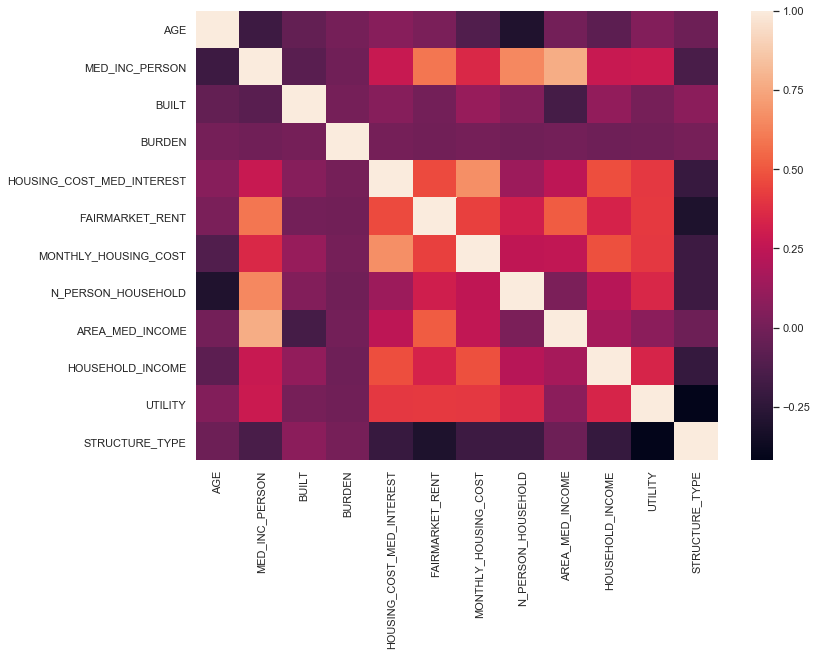

In [88]:
import seaborn as sns
%matplotlib inline

sns.set(rc={'figure.figsize':(11.7,8.27)})

# calculate the correlation matrix
corr = normalized_df.corr()

# plot the heatmap
sns.heatmap(corr,
            xticklabels=corr.columns,
            yticklabels=corr.columns)

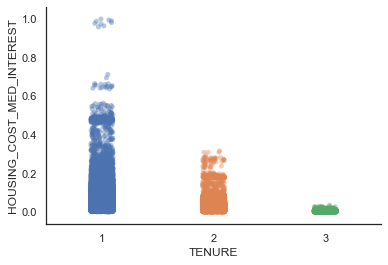

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

sns.set(style="white", color_codes=True)
sns.stripplot(x='TENURE', y='HOUSING_COST_MED_INTEREST', data=normalized_df, jitter=True, alpha=.40)
sns.despine()

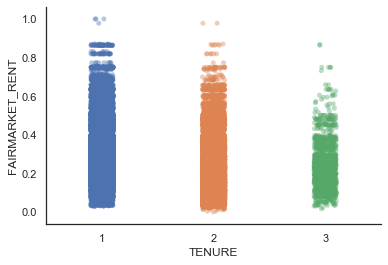

In [96]:
sns.set(style="white", color_codes=True)
sns.stripplot(x='TENURE', y='FAIRMARKET_RENT', data=normalized_df, jitter=True, alpha=.40)
sns.despine()

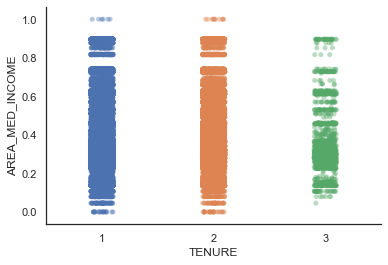

In [97]:
sns.set(style="white", color_codes=True)
sns.stripplot(x='TENURE', y='AREA_MED_INCOME', data=normalized_df, jitter=True, alpha=.40)
sns.despine()

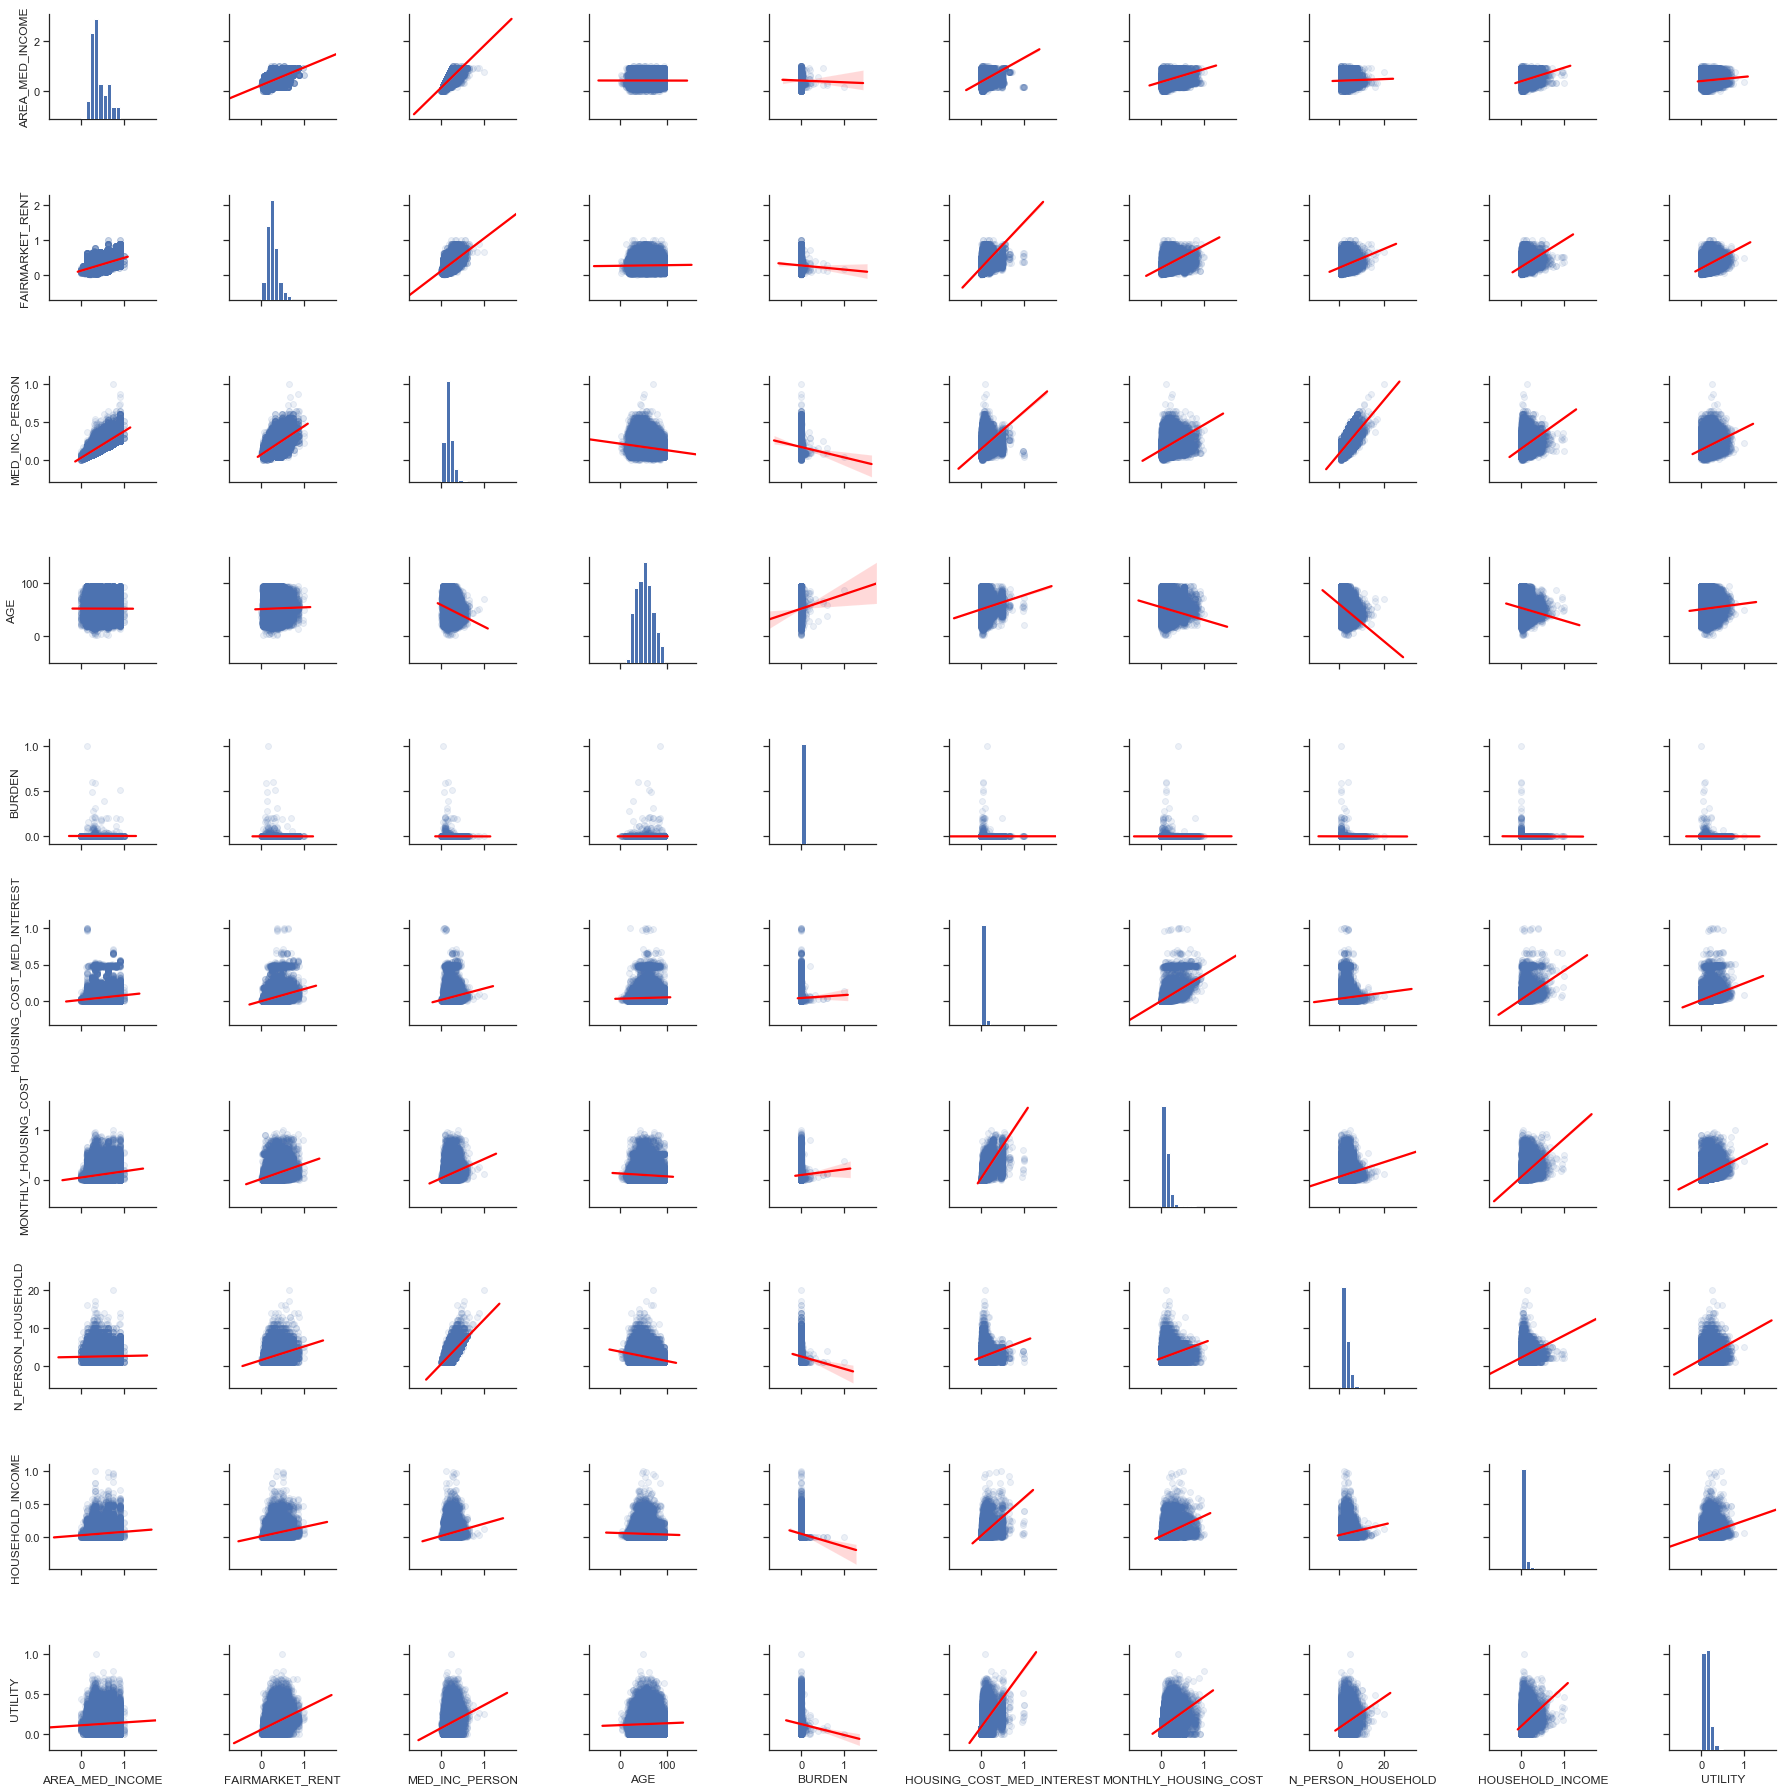

In [103]:
# sns.set(style="ticks")
sns.pairplot(sliced_df[['AREA_MED_INCOME',
                        'FAIRMARKET_RENT',
                        'MED_INC_PERSON',
                        'AGE',
                        'BURDEN',
                        'HOUSING_COST_MED_INTEREST',
                        'MONTHLY_HOUSING_COST',
                        'N_PERSON_HOUSEHOLD',
                        'HOUSEHOLD_INCOME',
                        'UTILITY']],
            kind='reg',
            plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})

In [122]:
spearman_corr_matrix = normalized_df.corr(method='spearman')
spearman_corr_matrix

,AGE,MED_INC_PERSON,BUILT,BURDEN,HOUSING_COST_MED_INTEREST,FAIRMARKET_RENT,MONTHLY_HOUSING_COST,N_PERSON_HOUSEHOLD,AREA_MED_INCOME,HOUSEHOLD_INCOME,UTILITY,STRUCTURE_TYPE,STRUCTURE_TYPE_1,STRUCTURE_TYPE_2,STRUCTURE_TYPE_3,STRUCTURE_TYPE_4,STRUCTURE_TYPE_5,STRUCTURE_TYPE_6
AGE,1.000000,-0.206146,-0.066453,-0.023489,0.045548,0.029677,-0.202027,-0.313656,-0.010855,-0.129585,0.070398,-0.098833,0.128332,-0.097564,-0.157301,-0.058202,0.092550,0.026575
MED_INC_PERSON,-0.206146,1.000000,-0.074142,-0.057073,0.358033,0.543064,0.388891,0.650361,0.735057,0.336682,0.289119,-0.141533,0.128000,0.004767,-0.056733,-0.061728,-0.067051,-0.085592
BUILT,-0.066453,-0.074142,1.000000,-0.038021,0.151940,0.019295,0.161550,0.070050,-0.157275,0.144875,0.038390,0.023567,0.007156,-0.132552,0.018300,0.019979,0.006418,0.111542
BURDEN,-0.023489,-0.057073,-0.038021,1.000000,-0.045892,-0.062890,0.178661,-0.135592,0.029540,-0.669573,-0.113883,0.189795,-0.200331,0.096848,0.107739,0.068990,0.102226,-0.010909
HOUSING_COST_MED_INTEREST,0.045548,0.358033,0.151940,-0.045892,1.000000,0.560508,0.739401,0.245595,0.269351,0.565443,0.503481,-0.383666,0.383069,-0.149867,-0.185945,-0.092456,-0.113441,-0.194252
FAIRMARKET_RENT,0.029677,0.543064,0.019295,-0.062890,0.560508,1.000000,0.454199,0.340018,0.417103,0.382017,0.449171,-0.374790,0.377814,-0.113121,-0.227390,-0.131486,-0.145699,-0.091403
MONTHLY_HOUSING_COST,-0.202027,0.388891,0.161550,0.178661,0.739401,0.454199,1.000000,0.321777,0.252151,0.542913,0.421895,-0.247338,0.240770,-0.082433,-0.103068,-0.049781,-0.086641,-0.150753
N_PERSON_HOUSEHOLD,-0.313656,0.650361,0.070050,-0.135592,0.245595,0.340018,0.321777,1.000000,0.026900,0.353689,0.405629,-0.241060,0.236531,-0.051651,-0.111038,-0.104089,-0.183616,-0.004731
AREA_MED_INCOME,-0.010855,0.735057,-0.157275,0.029540,0.269351,0.417103,0.252151,0.026900,1.000000,0.163654,0.045543,0.007402,-0.023480,0.052202,0.019030,0.005899,0.057247,-0.118654
HOUSEHOLD_INCOME,-0.129585,0.336682,0.144875,-0.669573,0.565443,0.382017,0.542913,0.353689,0.163654,1.000000,0.405548,-0.337067,0.339621,-0.136795,-0.160056,-0.093866,-0.148793,-0.106647


In [124]:
pearson_corr_matrix = normalized_df.corr(method='pearson')
pearson_corr_matrix

,AGE,MED_INC_PERSON,BUILT,BURDEN,HOUSING_COST_MED_INTEREST,FAIRMARKET_RENT,MONTHLY_HOUSING_COST,N_PERSON_HOUSEHOLD,AREA_MED_INCOME,HOUSEHOLD_INCOME,UTILITY,STRUCTURE_TYPE,STRUCTURE_TYPE_1,STRUCTURE_TYPE_2,STRUCTURE_TYPE_3,STRUCTURE_TYPE_4,STRUCTURE_TYPE_5,STRUCTURE_TYPE_6
AGE,1.000000,-0.189140,-0.054891,0.008342,0.068982,0.023953,-0.118721,-0.296776,-0.001900,-0.075068,0.050242,-0.021741,0.116688,-0.094762,-0.154267,-0.054276,0.107940,0.024113
MED_INC_PERSON,-0.189140,1.000000,-0.086806,-0.009158,0.276741,0.593321,0.356424,0.647372,0.769293,0.275413,0.285652,-0.142929,0.121515,0.004381,-0.051335,-0.058914,-0.065182,-0.082959
BUILT,-0.054891,-0.086806,1.000000,0.003403,0.062123,-0.000130,0.114103,0.051714,-0.160190,0.101403,0.012743,0.077789,0.004233,-0.143491,0.026644,0.018860,0.013473,0.113568
BURDEN,0.008342,-0.009158,0.003403,1.000000,0.004730,-0.004964,0.007004,-0.012005,-0.002124,-0.018933,-0.009034,0.009292,-0.007569,0.000025,0.000424,0.005158,0.008949,0.001989
HOUSING_COST_MED_INTEREST,0.068982,0.276741,0.062123,0.004730,1.000000,0.463975,0.672918,0.134145,0.245413,0.474586,0.408516,-0.208277,0.239565,-0.098830,-0.128951,-0.064645,-0.050964,-0.110771
FAIRMARKET_RENT,0.023953,0.593321,-0.000130,-0.004964,0.463975,1.000000,0.439692,0.313023,0.514349,0.331477,0.416982,-0.305551,0.350302,-0.103779,-0.207904,-0.122241,-0.137817,-0.087422
MONTHLY_HOUSING_COST,-0.118721,0.356424,0.114103,0.007004,0.672918,0.439692,1.000000,0.247391,0.252466,0.482615,0.411804,-0.188097,0.206667,-0.077157,-0.109229,-0.053331,-0.042073,-0.114643
N_PERSON_HOUSEHOLD,-0.296776,0.647372,0.051714,-0.012005,0.134145,0.313023,0.247391,1.000000,0.027884,0.218996,0.349479,-0.188736,0.206290,-0.045059,-0.101770,-0.090065,-0.156296,-0.001495
AREA_MED_INCOME,-0.001900,0.769293,-0.160190,-0.002124,0.245413,0.514349,0.252466,0.027884,1.000000,0.168527,0.077950,-0.022789,-0.019556,0.044687,0.018949,-0.000076,0.054377,-0.108228
HOUSEHOLD_INCOME,-0.075068,0.275413,0.101403,-0.018933,0.474586,0.331477,0.482615,0.218996,0.168527,1.000000,0.336652,-0.213889,0.246062,-0.100240,-0.124582,-0.068833,-0.086669,-0.085767


In [32]:
import numpy as np
from sklearn.model_selection import train_test_split

X = sliced_df[['MED_INC_PERSON',
               'MONTHLY_HOUSING_COST',
               'AREA_MED_INCOME',
               'UTILITY']]
y = sliced_df[['FAIRMARKET_RENT']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
import statsmodels.api as sm
X = X_train
y = y_train
result = sm.OLS(y, X).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        FAIRMARKET_RENT   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                 2.077e+05
Date:                Tue, 21 May 2019   Prob (F-statistic):               0.00
Time:                        13:36:33   Log-Likelihood:                 90588.
No. Observations:               94245   AIC:                        -1.812e+05
Df Residuals:                   94241   BIC:                        -1.811e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
MED_INC_PERSON           0.4378      0.006     68.075      0.000       0.425       0.450
MONTHLY_HOUSING_COST     0.2738      0.004     67.866      0.000       0.266       0.282
AREA_MED_INCOME          0.2382      0.002     96.643      0.000       0.233       0.243
UTILITY                  0.4743      0.004    119.340      0.000       0.467       0.482
==============================================================================
Omnibus:                     9349.086   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14623.016
Skew:                           0.738   Prob(JB):                         0.00
Kurtosis:                       4.242   Cond. No.                         11.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
# 95% CI for regression
result.conf_int(alpha=0.05, cols=None)

,0,1
MED_INC_PERSON,0.425221,0.450433
MONTHLY_HOUSING_COST,0.265941,0.281758
AREA_MED_INCOME,0.233367,0.243028
UTILITY,0.466502,0.482082


In [34]:
y_pred = result.predict(X_test)
print(y_pred)

60824     0.190896
74409     0.433361
108500    0.198105
97346     0.337352
87359     0.185426
37610     0.152934
55354     0.248729
93888     0.296176
16877     0.481145
44465     0.269833
25525     0.231973
97577     0.328733
15960     0.234589
91565     0.374682
51190     0.402204
64714     0.389863
7787      0.198919
74517     0.345542
110389    0.173702
95604     0.383546
114767    0.186991
126128    0.255510
57316     0.292660
56402     0.415708
78397     0.089653
108034    0.288779
65705     0.368054
95315     0.324963
125139    0.214375
26372     0.201825
            ...   
118015    0.418990
65730     0.486975
25539     0.141107
33931     0.286556
109327    0.187673
12257     0.264569
38042     0.284319
39295     0.207972
2169      0.247910
45920     0.244813
65364     0.388906
52368     0.189401
39893     0.200207
39554     0.287711
29331     0.484863
3056      0.311284
62772     0.173801
108139    0.230794
10801     0.550279
47114     0.222294
19199     0.199455
56951     0.

In [35]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

0.0086201940861455762